In [1]:
# Generic imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
import scipy.optimize as optimization
sys.path.append('../../..')
import plotly.graph_objects as go
from plotly.offline import iplot

# Local imports
import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

CUDA not available.


In [2]:
%matplotlib inline

The next cell has parameters that might change from crystal to crystal

In [3]:
# Loading in the compressed data
Segmentname = 'Segments1'
Flattenedfilename = Segmentname+'_compr_flat_filt.npz'; print(Flattenedfilename)

# Histogram accumulation: indexing starts at 0 for the upper-left, down, then across. Set to [] for all segments
accumlist = [] 

# Parameters for binning
Z2minforhist = 0.0
Z2maxforhist = .03
Z2offset = 0.001
nbins_max = 5
levels = 3

Segments1_compr_flat_filt.npz


In [4]:
# Derivative names
Roughnessfilename = Flattenedfilename[0:-4]+'_roughness.jpg'; print(Roughnessfilename)
flattenedfile = np.load(Flattenedfilename); print(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

# This folder
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)

Segments1_compr_flat_filt_roughness.jpg
Segments1_compr_flat_filt.npz
8
2023-06-27/case1 (calibration)


In [5]:
# Histogram accumulation
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)]
plotthisone = accumlist
print('Accumulating segments', accumlist)
print('Plotting segments', plotthisone)

# Parameters for binning
print('Z2 ranging from', Z2minforhist, 'to', Z2maxforhist)
print('Max number of bins specified is', nbins_max)
Ntot = np.size(zgridtot[0]) # Just using the first one for a size estimate
nbins_sturges = int(1+3.3*np.log10(Ntot)); print('Sturges rule says maxbins =', nbins_sturges)
nbins = np.min([nbins_max,nbins_sturges]); print('Using nbins = ', nbins)
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,nbins); #print(Z2bins)
Z2theory = np.linspace(Z2minforhist,Z2maxforhist,50) 
# Z2theory=Z2theory[1:] 
Z2theory=Z2theory[:-1] + Z2offset
print('Using levels =', levels, 'for uncertainty analysis')

Accumulating segments [0, 1, 2, 3, 4, 5, 6, 7]
Plotting segments [0, 1, 2, 3, 4, 5, 6, 7]
Z2 ranging from 0.0 to 0.03
Max number of bins specified is 5
Sturges rule says maxbins = 10
Using nbins =  5
Using levels = 3 for uncertainty analysis


Original =  792
4 0 198 [133  43  14   6]
4 1 198 [128  41  20   5]
4 2 198 [133  47  14   2]
4 3 198 [143  40  12   2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.0064932001876249115
statsigma =  0.08058039580211127

****Working on segment 0
std dev of height =  0.12226192399531549
integral =  0.00485632183908046
error =  [7.95676768 3.91506334 4.38097847 2.60720368]
Original =  792
4 0 198 [85 52 20  9]
4 1 198 [89 45 30  5]
4 2 198 [86 60 21 10]
4 3 198 [99 44 26 13]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.015120092160377794
statsigma =  0.12296378393810836

****Working on segment 1
std dev of height =  0.3420673980998087
integral =  0.005360230547550432
error =  [8.26907444 9.5798534  6.00573324 4.27121864]
Original =  792
4 0 198 [100  43  18  10]
4 1 198 [109  45  15   5]
4 2 198 [120  34  20  12]
4 3 198 [108  46  26  10]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.013778829077034382
statsigma =  0.11738325722620914

****Working on s

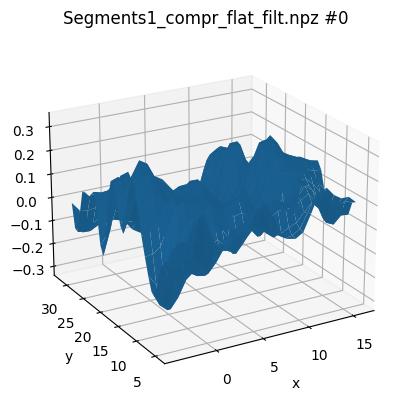

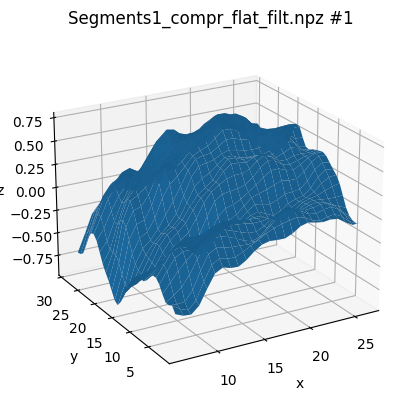

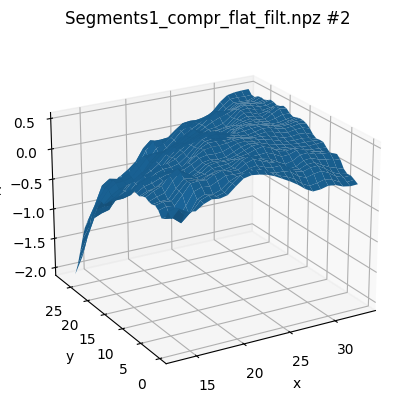

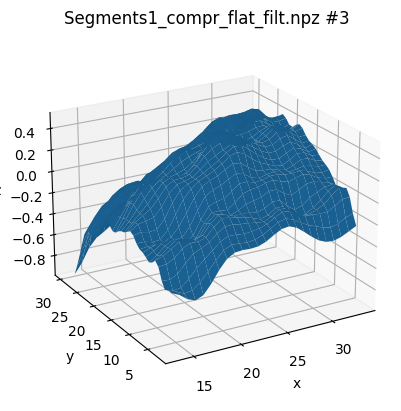

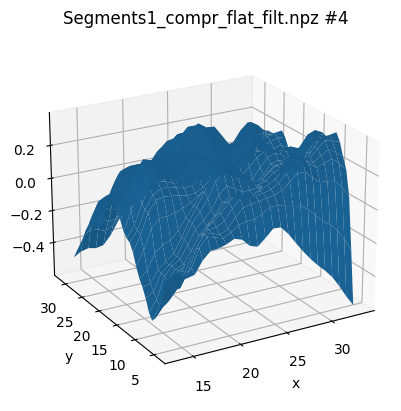

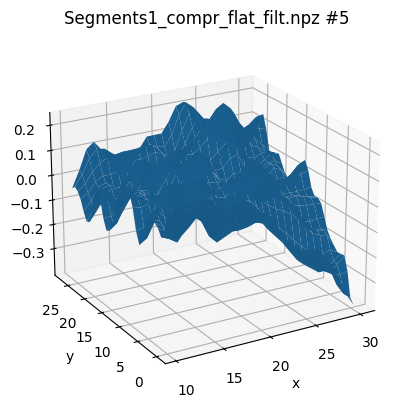

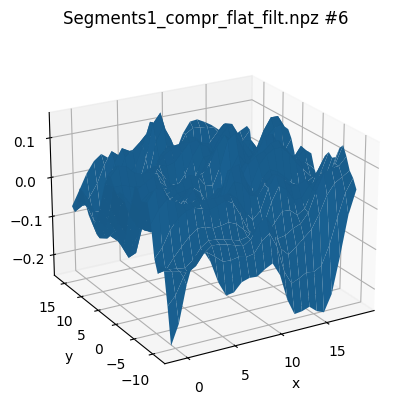

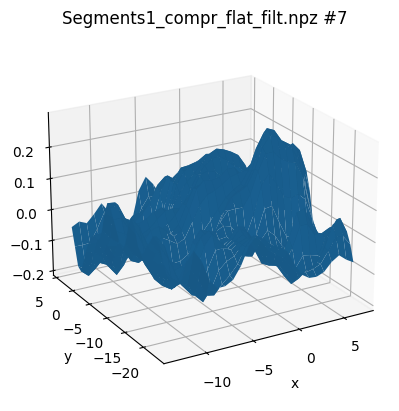

In [6]:
# Arrays for accumulating 
counts_list = []
meanZ2_list = []
Z2flat_list = []

# First-guess for Weibull fitting (sigma2W, etaW)
x0 = np.array([.1,.9])

# This suppresses warnings when lots of graphics windows are open
import matplotlib
matplotlib.rc('figure', max_open_warning = 0)

# This is for when we want to show or suppress intermediate graphics and other output
Show_intermediate_graphics = True

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    Ntot = np.size(sollast)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)

    # Get the probability distribution in Z2
    counts, bins, meanZ2, Z2flat, error = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins,levels=levels)
    print('meanZ2 = ', meanZ2)
    print('statsigma = ', np.sqrt(meanZ2))

    # Plot if we want
    if isegment in plotthisone:
        
        # Reporting
        print('')
        print('****Working on segment', isegment)
        
        # Graph the surface
        if Show_intermediate_graphics:
            fig1 = plt.figure()
            ax = fig1.add_subplot(111, projection='3d')
            ax.plot_surface(xgrid, ygrid, sollast)
            title = Flattenedfilename+' #'+str(isegment)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title(title)
            ax.view_init(azim=-120,elev=22)
        
        # Normalize the distribution function, report stats
        integral_rho = np.trapz(counts, bins)
        print ('std dev of height = ', np.std(sollast))
        print('integral = ', integral_rho)
        counts = counts/integral_rho
        error = error/integral_rho
        print('error = ', error)

#         # This is for calculating the errors in fitting (and graphing)
#         countsplus = counts+error; #print(countsplus)
#         countsminus = counts**2/countsplus; #print(countsminus)

#         # Graph the probability
#         if Show_intermediate_graphics:
            
#             # Using plotly
#             plot1 = go.Scatter(x=bins, y=np.log(counts), marker=dict(color='blue'),mode='markers')
#             plot2 = go.Scatter(x=bins, y=np.log(countsplus), marker=dict(color='black'),mode='markers')
#             plot3 = go.Scatter(x=bins, y=np.log(countsminus), marker=dict(color='black'),mode='markers')
#             iplot([plot1,plot2,plot3])

#         # Eliminate entries greater than a threshold (not sure if this is necessary)
#         ikeep = np.argwhere(Z2flat < Z2maxforhist)
#         Z2flat_new = np.squeeze(Z2flat[ikeep])

#         # Specify errors in a log space
#         errors = countsplus/counts; #print(errors)
        
#         # Do a linear fit
#         f_linear = lambda x, a, b: a + b*x   # function to fit
#         solution, corr = optimization.curve_fit(f_linear, bins+Z2offset, np.log(counts), [5, -100], errors)
#         a_linear_optimized = solution[0]; print('a_linear_optimized', a_linear_optimized)
#         b_linear_optimized = solution[1]; print('b_linear_optimized', b_linear_optimized)
#         sigma2G = -1/b_linear_optimized
#         sigmaG = np.sqrt(sigma2G); print('sigmaG', sigmaG)

#         # Do a quadratic fit
#         f_quadratic = lambda x, a, b, c: a + b*x +c*x**2  # function to fit
#         solution, corr = optimization.curve_fit(f_quadratic, bins+Z2offset, np.log(counts), [5, -100, 0], errors)
#         a_quadratic_optimized = solution[0]; print('a_quadratic_optimized', a_quadratic_optimized)
#         b_quadratic_optimized = solution[1]; print('b_quadratic_optimized', b_quadratic_optimized)
#         c_quadratic_optimized = solution[2]; print('c_quadratic_optimized', c_quadratic_optimized)
#         sigma2W = -1/b_quadratic_optimized
#         sigmaW = np.sqrt(sigma2W); print('approximate sigmaW', sigmaW)
        
#         # Calculate the Gaussian fit
#         myGaussian = sts.Gaussian(Z2theory,sigma2G)
        
#         # Calculate the Weibill fit -- 
#         # Note that this is a kluge: it should be replaced by myWeibull = sts.Weibull(Z2theory,sigma2W,etaW)
#         myWeibull = np.exp(f_quadratic(Z2theory,a_quadratic_optimized,b_quadratic_optimized,c_quadratic_optimized))

#         # Graph data with the best-fit probabilities
#         if Show_intermediate_graphics:
#             # Using matplotlib
#             plt.figure()
#             plt.semilogy(bins, counts, 'ok')
#             plt.semilogy(bins, countsplus, '+k')
#             plt.semilogy(bins, countsminus,'+k')
#             plt.title(title)
#             plt.xlabel(r'$Z^{2}$')
#             plt.ylabel(r'$\rho$')
#             plt.grid(True)
#             plt.semilogy(Z2theory, myGaussian, 'b',label = 'Gaussian with $\sigma_G$ = ' + str(sigmaG)[0:5])
#             plt.semilogy(Z2theory, myWeibull, 'g--',label = 'Quadratic')
#             plt.legend()

    # Accumulate if we want
    if isegment in accumlist:
        counts_list.append(counts)
        meanZ2_list.append(meanZ2)
        Z2flat_list.append(Z2flat)

In [7]:
# Sum up the accumulated information
Z2flat_total = []
for i in Z2flat_list:
    for j in i:
        Z2flat_total.append(j)
Z2flat_total = np.array(Z2flat_total)
Z2flat_new = np.squeeze(Z2flat_total)

# Get the probability distribution in Z2
counts, bins, meanZ2, error = rs.getrhoofz2flat(Z2flat,nbins,Z2bins,levels)
print('meanZ2 = ', meanZ2)
print('statsigma = ', np.sqrt(meanZ2))

# Normalize the distribution function
integral_rho = np.trapz(counts, bins)
print('integral = ', integral_rho)
counts = counts/integral_rho
error = error/integral_rho
countsplus = counts+error; #print(countsplus)
countsminus = counts**2/countsplus; #print(countsminus)

Original =  792
4 0 198 [177  19   2   0]
4 1 198 [170  24   3   1]
4 2 198 [176  16   5   1]
4 3 198 [177  16   5   0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.0035934677039077025
statsigma =  0.05994553948299825
integral =  0.004176136363636364


a_linear_optimized 5.537238047428833
b_linear_optimized -259.20085102980613
sigmaG 0.062112897407626
a_quadratic_optimized 5.621334499736847
b_quadratic_optimized -294.8643999672679
c_quadratic_optimized 1720.9499297746088
sigmaQ 0.05823563684163322
sigmaW 0.0594765381234033


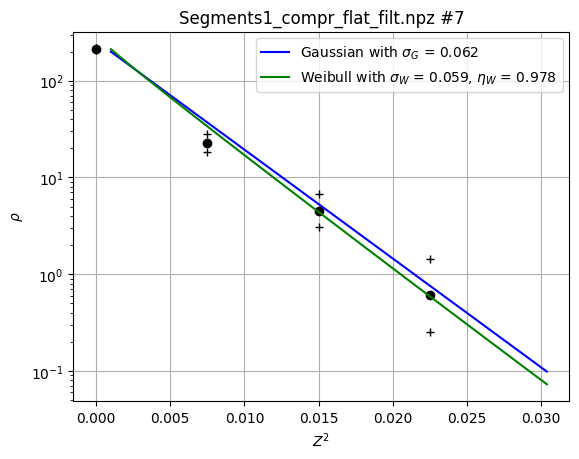

In [8]:
# Specify errors in a log space
errors = countsplus/counts; #print(errors)

# Do a linear fit
f_linear = lambda x, a, b: a + b*x   # function to fit
solution, corr = optimization.curve_fit(f_linear, bins+Z2offset, np.log(counts), [5, -100], errors)
a_linear_optimized = solution[0]; print('a_linear_optimized', a_linear_optimized)
b_linear_optimized = solution[1]; print('b_linear_optimized', b_linear_optimized)

# Calculate the Gaussian parameter (sigmaG) from the best-fit slope, and the resulting PDF
sigma2G = -1/b_linear_optimized
sigmaG = np.sqrt(sigma2G); print('sigmaG', sigmaG)
myGaussian = sts.Gaussian(Z2theory,sigma2G)

# Do a quadratic fit
f_quadratic = lambda x, a, b, c: a + b*x +c*x**2  # function to fit
solution, corr = optimization.curve_fit(f_quadratic, bins+Z2offset, np.log(counts), [5, -100, 0], errors)
a_quadratic_optimized = solution[0]; print('a_quadratic_optimized', a_quadratic_optimized)
b_quadratic_optimized = solution[1]; print('b_quadratic_optimized', b_quadratic_optimized)
c_quadratic_optimized = solution[2]; print('c_quadratic_optimized', c_quadratic_optimized)

# Calculate Quadratic parameters (sigmaQ, etaQ) from the best-fit slope and curvature, and the resulting PDF
sigma2Q, etaQ = sts.bc_to_Q_parameters(b_quadratic_optimized,c_quadratic_optimized)
sigmaQ = sigma2Q**.5; print('sigmaQ', sigmaQ)
myQuadratic = sts.Quadratic(Z2theory,sigma2Q,etaQ)
myQuadratic *= counts[0]/myQuadratic[0] # This is a kluge until we get the normalization factor formula

# Calculate Weibull parameters (sigmaW, etaW) from the best-fit slope and curvature, and the resulting PDF
sigma2W, etaW = sts.bc_to_Weibull_parameters(b_quadratic_optimized,c_quadratic_optimized)
sigmaW = sigma2W**.5; print('sigmaW', sigmaW)
myWeibull = sts.Weibull(Z2theory,sigma2W,etaW)

# Graph data with the best-fit probabilities
plt.figure()
plt.semilogy(bins, counts, 'ok')
plt.semilogy(bins, countsplus, '+k')
plt.semilogy(bins, countsminus,'+k')
plt.title(title)
plt.xlabel(r'$Z^{2}$')
plt.ylabel(r'$\rho$')
plt.grid(True)
plt.semilogy(Z2theory, myGaussian, 'b',label = 'Gaussian with $\sigma_G$ = ' + str(sigmaG)[0:5])
plt.semilogy(Z2theory, myWeibull, 'g',label = \
             'Weibull with $\sigma_W$ = ' + str(sigmaW)[0:5] + ', $\eta_W$ = ' + str(etaW)[0:5])
# plt.semilogy(Z2theory, myQuadratic, 'r--',label = \
#              'Quadratic with $\sigma_Q$ = ' + str(sigmaQ)[0:5] + ', $\eta_Q$ = ' + str(etaQ)[0:5])
plt.legend()

In [9]:
# # Save the roughness figure
# plt.savefig(Roughnessfilename)

In [10]:
# Saving ith segment as a textfile.
saving_text_file = False
if saving_text_file:
    iSegment = 0
    zfilename = Segmentname+'_z_values.csv'; print(zfilename)
    xfilename = Segmentname+'_x_values.csv'; print(xfilename)
    yfilename = Segmentname+'_y_values.csv'; print(yfilename)
    Z2filename = Segmentname+'_Z2_values.csv'; print(Z2filename)
    print(np.shape(zgridtot))
    print(np.shape(Z2flat_list[iSegment]))

    myxgridtot = xgridtot[iSegment,0,:]
    myygridtot = ygridtot[iSegment,:,0]
    myzgridtot = zgridtot[iSegment,:,:]
    myZ2flat = Z2flat_list[iSegment]

    nxy = np.shape(myzgridtot)
    ny = nxy[0]
    nx = nxy[1]
    print(nxy)

    myZ2 = np.reshape(myZ2flat, (ny-1,nx-1)) # Z2 is 1 shorter in either dimension

    print(np.shape(myZ2))
    np.savetxt(zfilename, myzgridtot, delimiter = ',')
    np.savetxt(xfilename, myxgridtot, delimiter = ',')
    np.savetxt(yfilename, myygridtot, delimiter = ',')
    np.savetxt(Z2filename, Z2flat_list[iSegment], delimiter = ',')

    fig = go.Figure(data = go.Surface(x = myxgridtot[1:], y = myygridtot[1:], z = myZ2))
    fig.update_layout(scene = dict(xaxis_title = 'x',yaxis_title = 'y',zaxis_title = 'z'))